In [1]:
setwd(paste0(Sys.getenv('R_SOURCES'), '/house_prices'))
getwd()

[1] "/mnt/hdd/develop/kaggle/R_sources/house_prices"

In [3]:
source('main.R')

house_prices$helpers$import_libs()

combined_dataset <- house_prices$helpers$load_data()

In [4]:
combined_dataset %>% dim
combined_dataset %>% filter(dataSource == "train") %>% dim
combined_dataset %>% filter(dataSource == "test") %>% dim

[1] 2919   82

[1] 1460   82

[1] 1459   82

In [5]:
categ_data <- 
    combined_dataset %>% 
    select(house_prices$helpers$get_character_colnames(combined_dataset), SalePrice, -dataSource)

numeric_data <- 
    combined_dataset %>% 
    select(house_prices$helpers$get_numeric_colnames(combined_dataset), -Id)

In [6]:
categ_data %>% glimpse(50)

Observations: 2,919
Variables: 45
$ Alley         <chr> NA, NA, NA, NA, NA, NA,...
$ BldgType      <chr> "1Fam", "1Fam", "1Fam",...
$ BsmtCond      <chr> "TA", "TA", "TA", "Gd",...
$ BsmtExposure  <chr> "No", "Gd", "Mn", "No",...
$ BsmtFinType1  <chr> "GLQ", "ALQ", "GLQ", "A...
$ BsmtFinType2  <chr> "Unf", "Unf", "Unf", "U...
$ BsmtQual      <chr> "Gd", "Gd", "Gd", "TA",...
$ CentralAir    <chr> "Y", "Y", "Y", "Y", "Y"...
$ Condition1    <chr> "Norm", "Feedr", "Norm"...
$ Condition2    <chr> "Norm", "Norm", "Norm",...
$ Electrical    <chr> "SBrkr", "SBrkr", "SBrk...
$ ExterCond     <chr> "TA", "TA", "TA", "TA",...
$ Exterior1st   <chr> "VinylSd", "MetalSd", "...
$ Exterior2nd   <chr> "VinylSd", "MetalSd", "...
$ ExterQual     <chr> "Gd", "TA", "Gd", "TA",...
$ Fence         <chr> NA, NA, NA, NA, NA, "Mn...
$ FireplaceQu   <chr> NA, "TA", "TA", "Gd", "...
$ Foundation    <chr> "PConc", "CBlock", "PCo...
$ Functional    <chr> "Typ", "Typ", "Typ", "T...
$ GarageCond    <chr> "TA", "TA", "

In [7]:
numeric_data %>% glimpse(50)

Observations: 2,919
Variables: 36
$ BedroomAbvGr  <int> 3, 3, 3, 3, 4, 1, 3, 3,...
$ BsmtFinSF1    <int> 706, 978, 486, 216, 655...
$ BsmtFinSF2    <int> 0, 0, 0, 0, 0, 0, 0, 32...
$ BsmtFullBath  <int> 1, 0, 1, 1, 1, 1, 1, 1,...
$ BsmtHalfBath  <int> 0, 1, 0, 0, 0, 0, 0, 0,...
$ BsmtUnfSF     <int> 150, 284, 434, 540, 490...
$ EnclosedPorch <int> 0, 0, 0, 272, 0, 0, 0, ...
$ Fireplaces    <int> 0, 1, 1, 1, 1, 0, 1, 2,...
$ FullBath      <int> 2, 2, 2, 1, 2, 1, 2, 2,...
$ GarageArea    <int> 548, 460, 608, 642, 836...
$ GarageCars    <int> 2, 2, 2, 3, 3, 2, 2, 2,...
$ GarageYrBlt   <int> 2003, 1976, 2001, 1998,...
$ GrLivArea     <int> 1710, 1262, 1786, 1717,...
$ HalfBath      <int> 1, 0, 1, 0, 1, 1, 0, 1,...
$ KitchenAbvGr  <int> 1, 1, 1, 1, 1, 1, 1, 1,...
$ LotArea       <int> 8450, 9600, 11250, 9550...
$ LotFrontage   <int> 65, 80, 68, 60, 84, 85,...
$ LowQualFinSF  <int> 0, 0, 0, 0, 0, 0, 0, 0,...
$ MasVnrArea    <int> 196, 0, 162, 0, 350, 0,...
$ MiscVal       <int> 0, 0, 0, 0, 0

In [8]:
entropy = function(col) {
    counts = table(col, useNA="ifany")
    freqs <- counts / length(col)
    -sum(freqs * log2(freqs))
}

In [9]:
categ_data %>%
select(-SalePrice) %>%
purrr::map(entropy) %>% 
unlist %>% 
sort -> x

x %>% head(10)
x %>% tail

Utilities      PoolQC      Street  Condition2    RoofMatl     Heating 
 0.01262749  0.03820308  0.03850369  0.10643374  0.13851938  0.13977521 
MiscFeature   LandSlope  CentralAir       Alley 
 0.24448832  0.30379935  0.35518274  0.42339144

HouseStyle BsmtFinType1  Exterior1st  Exterior2nd   MSSubClass Neighborhood 
    1.836382     2.454724     2.723429     2.800720     2.920021     4.212100

In [10]:
numeric_data %>%
select(-SalePrice) %>%
purrr::map(entropy) %>% 
unlist %>% 
sort -> x

x %>% head(10)
x %>% tail

PoolArea   X3SsnPorch LowQualFinSF KitchenAbvGr BsmtHalfBath      MiscVal 
  0.05767714   0.15876902   0.17326513   0.28095915   0.34480765   0.37490332 
 ScreenPorch     HalfBath BsmtFullBath     FullBath 
  0.99190729   1.01077114   1.07761708   1.17378492

GarageArea TotalBsmtSF   BsmtUnfSF   X1stFlrSF   GrLivArea     LotArea 
   7.968793    9.348757    9.390885    9.601608    9.882939   10.400602

In [13]:
combined_dataset %>% 
select(price=SalePrice) %>% 
na.omit %>%
mutate(
    price.log = log(price)
) %>%
gather(var, value) %>%
group_by(var) %>%
mutate(
    normed_value = (value - mean(value)) / sd(value)
) -> xxx

xxx %>%
arrange(var, value) %>% 
top_n(10, value)

var,value,normed_value
price,485000.00000,3.827659
price,501837.00000,4.039598
price,538000.00000,4.494808
price,555000.00000,4.708799
price,556581.00000,4.728701
price,582933.00000,5.060412
price,611657.00000,5.421982
price,625000.00000,5.589940
price,745000.00000,7.100466
price,755000.00000,7.226343


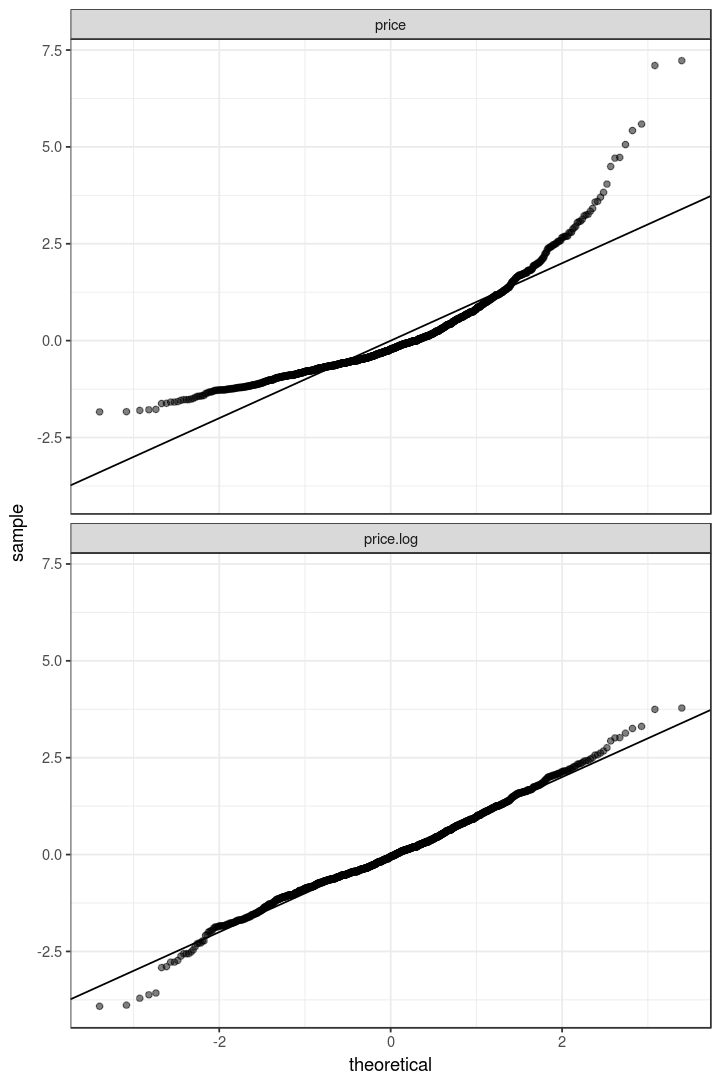

In [12]:
options(repr.plot.width = 6, repr.plot.height = 9)

xxx %>%
group_by(var) %>%
mutate(
    normed_value = (value - mean(value)) / sd(value)
) %>%
ggplot() +
geom_qq(aes(sample=normed_value), alpha=0.5) +
facet_wrap(~var, ncol=1) +
geom_abline(slope=1) +
theme_bw()

In [86]:
categ_data %>%
    filter(!is.na(SalePrice)) %>%
    gather(var, value, -SalePrice) %>%
    group_by(var, value) %>%
    summarise(
        n = n(),
        mean = mean(SalePrice),
        std = ifelse(n > 1, sd(SalePrice), SalePrice)
    ) %>%
    mutate(
        freq = n / sum(n)
    ) %>% 
    arrange(var, mean) %>%
    mutate(
        lead.mean = lead(mean, 1),
        lead.freq = lead(freq, 1),
        lead.std  = lead(std, 1),
        additive = (lead.mean - mean)^2 / (std^2/freq + lead.std^2/lead.freq)
    ) %>%
    summarise(
        score = sum(additive, na.rm = TRUE)
    ) %>%
    arrange(score) -> xxx

In [89]:
xxx %>% head(10)
xxx %>% tail(10)

var,score
Utilities,6.838188e-05
LotConfig,5.070409e-04
Functional,5.107211e-04
Condition2,7.559354e-04
PoolQC,1.065928e-03
LandSlope,1.476518e-03
MiscFeature,2.322199e-03
RoofStyle,2.322400e-03
Street,2.474654e-03
Electrical,3.260788e-03


var,score
MasVnrType,0.08587130
BsmtExposure,0.09660033
BsmtCond,0.10275736
HeatingQC,0.11795509
BsmtFinType1,0.12111550
CentralAir,0.20423012
GarageFinish,0.27560401
BsmtQual,0.42109810
KitchenQual,0.47752912
ExterQual,0.48715260


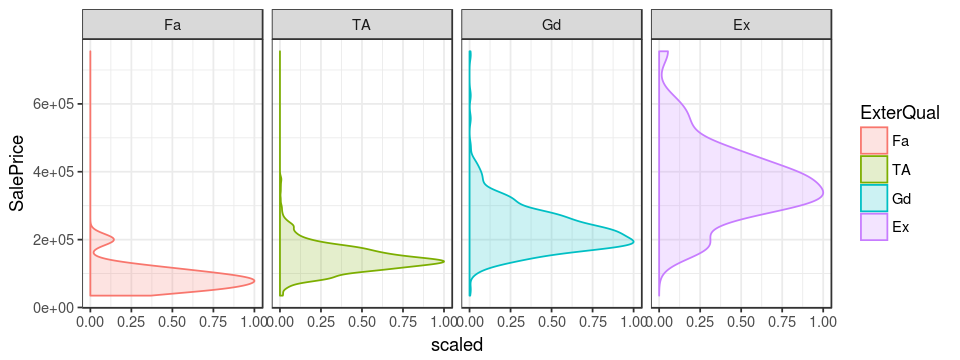

In [127]:
order_factor_by_target <- function(df, factor_var, target_var) {
    
    factor_var <- enquo(factor_var)
    factor_var_char <- as.character(factor_var)[2]
    target_var <- enquo(target_var)
    
    temp <-
        categ_data %>%
        filter(!is.na(!!target_var)) %>%
        select(!!factor_var, !!target_var)

    factor_ordering <- 
        temp %>%
        group_by(!!factor_var) %>%
        summarise(
            n = n(),
            mean = mean(!!target_var)
        ) %>%
        arrange(mean) %>%
        select(!!factor_var) %>%
        `[[`(1)
    
    temp %>%
    mutate(
        !!factor_var_char := factor(
            !!factor_var,
            levels=factor_ordering
        )
    )
}

order_factor_by_target(categ_data, ExterQual, SalePrice) %>%
ggplot(aes(SalePrice, color=ExterQual)) +
geom_density(aes(y=..scaled.., fill=ExterQual), alpha=.2) +
facet_wrap(~ExterQual, nrow=1) +
coord_flip() +
theme_bw()